In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
my_data= pd.read_csv("../../Python_New_Work/Mass_Shooting//Mass_Shooting.csv",encoding='latin-1')

In [4]:
my_data.head(5)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [5]:
my_data.columns.values


array(['S#', 'Title', 'Location', 'Date', 'Incident Area',
       'Open/Close Location', 'Target', 'Cause', 'Summary', 'Fatalities',
       'Injured', 'Total victims', 'Policeman Killed', 'Age',
       'Employeed (Y/N)', 'Employed at', 'Mental Health Issues', 'Race',
       'Gender', 'Latitude', 'Longitude'], dtype=object)

#### Checking the null values in the columns

In [6]:

my_data.isnull().sum()

S#                        0
Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
dtype: int64

In [7]:
from datetime import datetime


In [8]:
my_data['Date']=pd.to_datetime(my_data['Date'])

In [9]:
my_data['Shooting_year']=my_data['Date'].dt.year
my_data['Shooting_month']=my_data['Date'].dt.month

#### Filling the Null location values by extracting the data from Title column

In [10]:
my_data['loc1']=my_data.Title.str.extract('([A-Za-z]+, [A-Za-z]+)',expand=False)
my_data['loc2']=my_data.Title.str.extract('([A-Za-z]+ )', expand=False)

In [11]:
for i in range(len(my_data)):
    if(pd.isnull(my_data.loc[i,'Location'])):
        my_data.loc[i,'Location1']=my_data.loc[i,'loc1']
        if(pd.isnull(my_data['Location1'][i])):
            my_data.loc[i,'Location1']=my_data.loc[i,'loc2']
    else:
        my_data.loc[i,'Location1'] = my_data.loc[i,'Location']
    

In [12]:
my_data=my_data.drop(['Location','loc1','loc2'],axis=1)

In [13]:
my_data.rename(columns={'Location1':'Location'},inplace=True)

In [14]:
my_data['State']=my_data["Location"].str.rpartition(',')[2]

In [15]:
my_data['State'][my_data['State'].str.len()==3].value_counts().head()

 CA    5
 VA    3
 LA    2
 NM    2
 WA    2
Name: State, dtype: int64

In [16]:
my_data['State'].replace([' CA',' VA',' WA',' NM',' LA',' GA',' MD',' FL',' CO',' TX',' PA',' TN',' AZ',' NV',' AL',' DE',' NJ'],
                           ['California','Virginia','Washington','New Mexico','Louisiana','Georgia','Maryland','Florida',
                            'Colorado','Texas','Pennsylvania','Tennessee','Arizona','Nevada','Alabama','Delaware','New Jersey'], inplace=True)

In [17]:
my_data['State'].value_counts().head()

 California    29
 Florida       21
 Texas         16
 Georgia       14
 Washington    14
Name: State, dtype: int64

In [18]:
my_data['Gender'].value_counts().head()

Male           272
Unknown         21
M               20
Female           5
Male/Female      4
Name: Gender, dtype: int64

#### Reducing the Redundancy

In [19]:
my_data['Gender'].replace(["M","M/F"],['Male','Male/Female'],inplace=True)

In [20]:
my_data['Race'].value_counts()

White American or European American                    122
Black American or African American                      76
Unknown                                                 42
Some other race                                         20
white                                                   12
Asian American                                          11
White                                                    9
Asian                                                    6
Black                                                    5
Latino                                                   5
Native American or Alaska Native                         3
black                                                    3
Two or more races                                        2
Other                                                    2
Black American or African American/Unknown               1
White American or European American/Some other Race      1
Asian American/Some other race                          

In [21]:
my_data['Race'].replace(['White American or European American','white','White',
                         'White American or European American/Some other Race'],
                        ['White','White','White','White'],inplace=True)
my_data['Race'].replace(['Black American or African American', 'black', 
                           'Black American or African American/Unknown'], ['Black', 'Black', 'Black'], inplace=True)
my_data['Race'].replace(['Asian', 'Asian American/Some other race'], ['Asian American', 'Asian American'], inplace=True)
my_data['Race'].replace(['Unknown', 'Some other race', 'Two or more races'], ['Other', 'Other' ,'Other'], inplace=True)
my_data['Race'].replace(['Native American or Alaska Native'], ['Native American'], inplace=True)

In [22]:
my_data['Race'].value_counts()

White              144
Black               85
Other               66
Asian American      18
Latino               5
Native American      3
Name: Race, dtype: int64

In [23]:
my_data['Mental Health Issues'].value_counts()

Unknown    110
Yes        106
No          93
Unclear     13
unknown      1
Name: Mental Health Issues, dtype: int64

In [24]:
my_data['Mental Health Issues'].replace(['unknown','Unclear'],['Unknown','Unknown'],inplace=True)

In [25]:
my_data['Target'].value_counts()

random                       140
Family                        37
Coworkers                     17
Students                      16
Students+Teachers             14
Ex-Coworkers                   9
party guests                   8
Ex-Wife                        7
Policeman                      7
Teachers                       5
coworkers                      5
neighbors                      4
Ex-Wife & Family               3
Friends                        2
Children                       2
school girls                   2
Ex-Girlfriend                  2
police                         2
Contestant                     1
club members                   1
Ex-Girlfriend & Family         1
House Owner                    1
lawyers                        1
Ex-girlfriend                  1
prayer group                   1
hunters                        1
Ex-GirlFriend                  1
monks                          1
Sikhs                          1
Marines                        1
basketball

#### Converting the same type of value into one category

In [26]:
my_data['FTarget'] = np.nan
my_data.loc[my_data['Target'].str.contains("family",case=False, na=False), 'FTarget'] = 'Family'
my_data.loc[my_data['Target'].str.contains("Ex-",case=False, na=False), 'FTarget'] = 'Family'
my_data.loc[my_data['Target'].str.contains("coworker",case=False, na=False), 'FTarget'] = 'Coworkers'
my_data.loc[my_data['Target'].str.contains("employee",case=False, na=False), 'FTarget'] = 'Coworkers'
my_data.loc[my_data['Target'].str.contains("Student",case=False, na=False), 'FTarget'] = 'School'
my_data.loc[my_data['Target'].str.contains("player",case=False, na=False), 'FTarget'] = 'School'
my_data.loc[my_data['Target'].str.contains("teacher",case=False, na=False), 'FTarget'] = 'School'
my_data.loc[my_data['Target'].str.contains("school",case=False, na=False), 'FTarget'] = 'School'
my_data.loc[my_data['Target'].str.contains("random",case=False, na=False), 'FTarget'] = 'Random'



In [27]:
my_data['FTarget'].fillna(my_data['Target'],inplace=True)

In [28]:
my_data['FTarget'].value_counts()

Random                       143
Family                        54
School                        40
Coworkers                     33
party guests                   8
Policeman                      7
neighbors                      4
Friends                        2
police                         2
Children                       2
psychologist+psychiatrist      1
black men                      1
Policeman+Council Member       1
lawyers                        1
protestors                     1
monks                          1
House Owner                    1
TSA Officer                    1
hunters                        1
Social Workers                 1
prayer group                   1
Congresswoman                  1
Trooper                        1
Contestant                     1
postmaster                     1
club members                   1
birthday party bus             1
drug dealer                    1
Marines                        1
women                          1
Girlfriend

In [29]:
my_data['Incident Area'].value_counts()

Home                                                                   43
Workplace                                                               8
Home+School                                                             7
Church                                                                  5
street                                                                  4
Club                                                                    4
School                                                                  3
Fort Hood Army Post                                                     3
Shopping Mall                                                           3
Multiple Homes                                                          2
nightclub                                                               2
Apartment Complex                                                       2
Bart Township                                                           2
fraternity house party                

In [30]:
my_data['Area'] = np.nan
my_data.loc[my_data['Incident Area'].str.contains("school",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("University",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("college",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("dormitory",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("lecture",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("scool",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("academy",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("classroom",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("apartment",case=False, na=False), 'Area'] = 'Home'
my_data.loc[my_data['Incident Area'].str.contains("house",case=False, na=False), 'Area'] = 'Home'
my_data.loc[my_data['Incident Area'].str.contains("home",case=False, na=False), 'Area'] = 'Home'
my_data.loc[my_data['Incident Area'].str.contains("shop",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("Store",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("Restaurant",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("salon",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("spa",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("Cafe",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("grocery",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("mart",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("Office",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("Company",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("work",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("conference",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("firm",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("street",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("lot",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("walk",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("highway",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("interstate",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("club",case=False, na=False), 'Area'] = 'Pub-Club'
my_data.loc[my_data['Incident Area'].str.contains("pub",case=False, na=False), 'Area'] = 'Pub-Club'
my_data.loc[my_data['Incident Area'].str.contains("gas",case=False, na=False), 'Area'] = 'Gas-Station'
my_data.loc[my_data['Incident Area'].str.contains("party",case=False, na=False), 'Area'] = 'Party'
my_data.loc[my_data['Incident Area'].str.contains("airport",case=False, na=False), 'Area'] = 'Airport'
my_data.loc[my_data['Incident Area'].str.contains("clinic",case=False, na=False), 'Area'] = 'Hospital'
my_data.loc[my_data['Incident Area'].str.contains("Hospital",case=False, na=False), 'Area'] = 'Hospital'
my_data.loc[my_data['Incident Area'].str.contains("church",case=False, na=False), 'Area'] = 'Religious'
my_data.loc[my_data['Incident Area'].str.contains("temple",case=False, na=False), 'Area'] = 'Religious'
my_data.loc[my_data['Incident Area'].str.contains("monastery",case=False, na=False), 'Area'] = 'Religious'
my_data.Area.fillna(my_data['Incident Area'],inplace=True)

In [31]:
my_data['Cause'].value_counts()

psycho                  68
terrorism               65
anger                   44
frustration             18
domestic dispute        12
unemployement           10
revenge                 10
racism                   6
unknown                  4
failing exams            3
religious radicalism     1
domestic disputer        1
drunk                    1
breakup                  1
robbery                  1
suspension               1
Name: Cause, dtype: int64

In [32]:
my_data['Cause'].replace(['domestic disputer'],['domestic dispute'],inplace=True)

In [33]:
my_data["Open/Close Location"].value_counts()

Close         197
Open           78
Open+Close     19
Open+CLose      1
Name: Open/Close Location, dtype: int64

In [34]:
my_data['Open/Close Location'].replace(['Open+CLose'],['Open+Close'],inplace=True)


In [35]:
my_data['Age1']=np.nan
my_data.loc[my_data["Age"].str.contains(',',case=False,na=False),'Age1']=my_data['Age'].str.rpartition(",")[0]

In [36]:
my_data["Age1"].fillna(my_data['Age'],inplace=True)
my_data=my_data.drop('Age',axis=1)

In [37]:
my_data.rename(columns={'Age1':'Age'},inplace=True)

In [38]:
my_data.isnull().sum()

S#                        0
Title                     0
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
Shooting_year             0
Shooting_month            0
Location                  0
State                     0
FTarget                   5
Area                     62
Age                     144
dtype: int64

In [39]:
useful_data = pd.DataFrame(my_data[['Date', 'Shooting_year', 'Shooting_month', 'State', 'Fatalities','Injured', 'Total victims', 'Policeman Killed', 'Age', 
                             'Race', 'Gender','Cause', 'Area', 'FTarget', 'Latitude', 'Longitude','Mental Health Issues','Employeed (Y/N)']])
useful_data.head(2)

,Date,Shooting_year,Shooting_month,State,Fatalities,Injured,Total victims,Policeman Killed,Age,Race,Gender,Cause,Area,FTarget,Latitude,Longitude,Mental Health Issues,Employeed (Y/N)
0,2017-11-05,2017,11,Texas,26,20,46,0.0,26,White,Male,unknown,Religious,Random,NaN,NaN,No,NaN
1,2017-11-01,2017,11,Colorado,3,0,3,0.0,47,White,Male,unknown,Shop,Random,NaN,NaN,No,NaN


In [40]:
trace1= go.Histogram(x=useful_data.Date,marker=dict(color='rgba(255, 68, 26, 1)'),name='date')
data=[trace1]
layout=dict(plot_bgcolor='rgba(228, 255, 148, 1)',title=" US Mass Shotings 1965-2017 Details",
            yaxis=dict(title="Count of Shootings"),
            xaxis=dict(title="Killings in a particular time Interval",type='date')
           ,updatemenus=[dict(x=0.1,y=1.11,yanchor='top',active=1,showactive=True,
                            buttons=[dict(args=['xbins.size','M1'],label='Month',method='restyle')
                                    ,dict(args=['xbins.size','M12'],label='Year',method='restyle')
                                    ,dict(args=['xbins.size','M3'],label='Quarter',method='restyle'),
                                    dict(args=['xbins.size','D1'],label='Day',method='restyle')])])
fig=dict(data=data,layout=layout)
py.iplot(fig)

In [41]:
ms_year_stats = my_data[['Shooting_year', 'Total victims' ]].groupby(['Shooting_year']
             ,as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
ms_year_stats1 = my_data[['Shooting_year', 'Fatalities' ]].groupby(['Shooting_year'],
                   as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
ms_year_stats2 = my_data[['Shooting_year', 'Injured' ]].groupby(['Shooting_year'], 
                as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
ms_year_stats3 = my_data[['Shooting_year', 'Total victims' ]].groupby(['Shooting_year'], 
                as_index=False).count().sort_values(by='Shooting_year', ascending=False)



In [42]:
trace1=go.Scatter(mode='lines+markers',x=ms_year_stats['Shooting_year'],
                  y=ms_year_stats['Total victims'],name='Total Victims')
trace2=go.Scatter(mode='lines+markers',x=ms_year_stats1['Shooting_year'],
                  y=ms_year_stats1['Fatalities'],name='Fatalities')
trace3=go.Scatter(mode='lines+markers',x=ms_year_stats2['Shooting_year'],
                  y=ms_year_stats2['Injured'],name='Injuries')
trace4=go.Scatter(mode='lines',x=ms_year_stats3['Shooting_year'],
                  y=ms_year_stats3['Total victims'],name='Count of Shooting')

In [43]:
data=[trace1,trace2,trace3,trace4]
layout=dict(title='Fatalities and Injuries in Various Years')
py.iplot(dict(data=data,layout=layout))

In [44]:
ms_cause_cnt = useful_data[['Cause', 
                            'Total victims' ]].groupby(['Cause'], as_index=False).count().sort_values(by='Total victims'
                          , ascending=False)

In [45]:
ms_cause_cnt=ms_cause_cnt[ms_cause_cnt['Total victims']>9]

### Cause which invoked more Number of Shootings

In [46]:
ms_cause_cnt


,Cause,Total victims
6,psycho,68
12,terrorism,65
0,anger,44
5,frustration,18
2,domestic dispute,13
9,revenge,10
13,unemployement,10


#### Cause that resulted in more number of victims during shooting

In [47]:
ms_cause_sum = useful_data[['Cause', 'Total victims' ]].groupby(['Cause'], 
        as_index=False).sum().sort_values(by='Total victims', ascending=False)
ms_cause_sum=ms_cause_sum[ms_cause_sum['Total victims'] > 9]

In [48]:
ms_cause_sum

,Cause,Total victims
12,terrorism,875
14,unknown,640
6,psycho,574
0,anger,270
5,frustration,120
13,unemployement,103
9,revenge,61
7,racism,54
2,domestic dispute,49
4,failing exams,21


In [49]:
trace1=go.Pie(values=ms_cause_cnt['Total victims'],labels=ms_cause_cnt['Cause'],
              hoverinfo="label+percent+name",name="Cause Resulted in Shooting",hole=0.2,domain={'x':[0,.5]})
trace2=go.Pie(values=ms_cause_sum['Total victims'],labels=ms_cause_sum["Cause"],
              hoverinfo="label+percent",domain={'x':[0.5,1]},hole=0.2)
annotations=[]
annotations.append(dict(showarrow=False,font=dict(size=15),text='Number of Shooting for each cause',x=0.1,y=-0.14))
annotations.append(dict(showarrow=False,font=dict(size=15),text='Number of Victims for each cause',x=0.9,y=-0.14))
layout=dict(title=" \b Cause resulting in more number of shooting and number of people affected \b",
            annotations=annotations)
data=[trace1,trace2]
py.iplot(dict(data=data,layout=layout))

In [50]:
ms_race_cnt = useful_data[['Race', 'Total victims' ]].groupby(['Race'],
                     as_index=False).count().sort_values(by='Total victims', ascending=False)
ms_race_cnt

,Race,Total victims
5,White,144
1,Black,85
4,Other,66
0,Asian American,18
2,Latino,5
3,Native American,3


In [51]:
ms_race_sum = useful_data[['Race', 'Total victims' ]].groupby(['Race'],
                as_index=False).sum().sort_values(by='Total victims', ascending=False)
ms_race_sum

,Race,Total victims
5,White,2001
1,Black,556
4,Other,474
0,Asian American,200
2,Latino,49
3,Native American,25


In [52]:
trace1=go.Pie(values=ms_race_cnt['Total victims'],labels=ms_race_cnt['Race'],
              hoverinfo="label+percent+name",name="Race Resulted in More Shooting",hole=0.2,domain={'x':[0,.5]})
trace2=go.Pie(values=ms_race_sum['Total victims'],labels=ms_race_sum["Race"],
              hoverinfo="label+percent",domain={'x':[0.5,1]},hole=0.2)
annotations=[]
annotations.append(dict(showarrow=False,font=dict(size=15),text='Number of Shooting by each Race',x=0.1,y=-0.14))
annotations.append(dict(showarrow=False,font=dict(size=15),text='Number of Victims by each Race',x=0.9,y=-0.14))
layout=dict(title=" \b Number of shooting and Number of people affected by each Race",
            annotations=annotations)
data=[trace1,trace2]
py.iplot(dict(data=data,layout=layout))

White and black consitute for more number of Mass shootings as well impacting more victims. But, this statistic doesnt not give any clear picture as USA has predominantly more white people, followed by black and then other minorities like latinos, Asians, native Indians etc. The details arent clear to draw any inference based on the race of the shooter.

In [53]:
ms_health_cnt = pd.DataFrame(useful_data[['Cause','Race', 'Mental Health Issues',
                                 'Total victims']].groupby(['Cause','Race','Mental Health Issues'],
                            as_index=False).count().sort_values(by='Total victims', ascending=False))
ms_health_sum = pd.DataFrame(useful_data[['Cause','Race', 'Mental Health Issues',
                                 'Total victims']].groupby(['Cause','Race','Mental Health Issues'], 
                    as_index=False).sum().sort_values(by='Total victims', ascending=False))
ms_health_cnt.head()

,Cause,Race,Mental Health Issues,Total victims
39,psycho,White,Yes,22
64,terrorism,White,Yes,18
37,psycho,White,No,11
60,terrorism,Other,Unknown,8
38,psycho,White,Unknown,8


In [54]:
ms_health_sum.head()

,Cause,Race,Mental Health Issues,Total victims
72,unknown,White,Unknown,585
64,terrorism,White,Yes,407
39,psycho,White,Yes,253
60,terrorism,Other,Unknown,95
53,terrorism,Asian American,Yes,83


/home/raza/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/raza/.local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Text(0.5, 0.98, 'Number of Mass Shooting based on Race, Mental Health Issue and Cause')

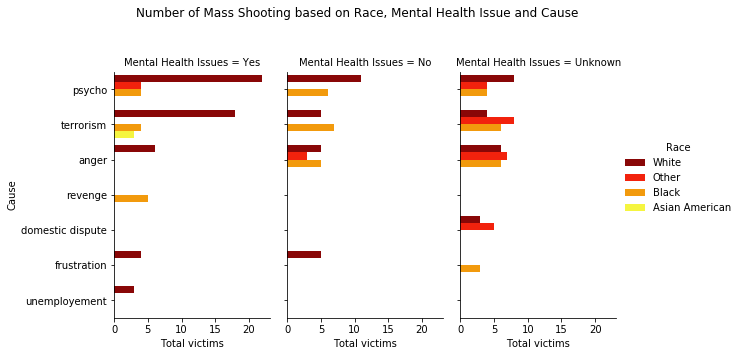

In [55]:

trace1= sns.factorplot(x='Total victims',y='Cause',col='Mental Health Issues',hue='Race',size=5,aspect=0.6,
                       col_wrap=3,ci=None,saturation=0.9,palette='hot',
                       data=ms_health_cnt[ms_health_cnt['Total victims']>2],kind='bar')
plt.subplots_adjust(top=0.8)
trace1.fig.suptitle("Number of Mass Shooting based on Race, Mental Health Issue and Cause")


Text(0.5, 0.98, 'Number of Victims based on Race, Mental Health Issue and Cause')

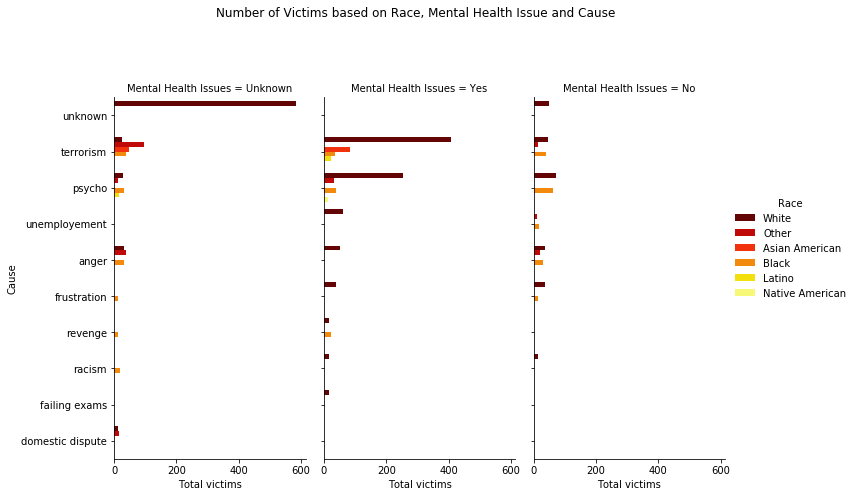

In [56]:

trace1= sns.factorplot(x='Total victims',y='Cause',col='Mental Health Issues',hue='Race',size=7,aspect=0.5,
                       col_wrap=3,ci=None,saturation=0.9,palette='hot',
                       data=ms_health_sum[ms_health_sum['Total victims']>10],kind='bar')
plt.subplots_adjust(top=0.8)
trace1.fig.suptitle("Number of Victims based on Race, Mental Health Issue and Cause")


In [57]:
impt_groups=my_data.pivot_table(values=['Total victims'],index=['Shooting_year','Race','Cause'],aggfunc=np.sum)

In [58]:
impt_groups

Total victims
Shooting_year Race           Cause                          
1966          White          terrorism                    54
1971          White          terrorism                     5
1972          Black          psycho                       22
1974          Other          anger                         4
              White          terrorism                    10
1976          White          anger                         8
                             terrorism                     9
1979          White          terrorism                    11
1982          White          psycho                       11
1983          Asian American terrorism                    14
              White          anger                         4
1984          Black          terrorism                    14
              White          psycho                       40
                             revenge                       7
1985          Black          anger                         3
1986          Black          revenge                       5
              White          failing exams                 4
1987          White          psycho                       20
1988          Black          terrorism                     6
              White          frustration                   3
                             psycho                       11
                             revenge                      11
                             terrorism                     8
1989          White          frustration                  20
                             psycho                        4
                             terrorism                    35
1990          Black          psycho                       17
1991          Asian American frustration                   6
                             robbery                       9
              Black          revenge                       3
...                                                      ...
2015          Asian American terrorism                    35
              Black          anger                         9
                             domestic dispute              4
                             psycho                       19
                             revenge                      19
                             terrorism                    22
              Other          domestic dispute             12
                             psycho                       10
                             terrorism                    51
              White          anger                        10
                             psycho                       28
                             racism                        5
                             terrorism                    24
2016          Black          anger                        12
                             frustration                   7
                             psycho                       20
                             racism                       16
                             terrorism                     7
              Other          anger                        32
                             domestic dispute              9
                             psycho                        3
                             terrorism                    44
              White          anger                         4
                             domestic dispute             18
                             psycho                       16
2017          Black          racism                        3
                             unknown                       6
              Latino         terrorism                    11
              White          terrorism                     3
                             unknown                     634

[160 rows x 1 columns]

In [59]:
ms_state = pd.DataFrame(useful_data[['State','Shooting_year', 'Latitude', 'Longitude', 'Fatalities']]
                        [useful_data['Fatalities']>0].sort_values(by='Fatalities', ascending=False))
ms_state['Desc'] = ms_state['State'] + '<br>Year ' + (ms_state['Shooting_year']).astype(str) +'<br>Fatalities ' + (ms_state['Fatalities']).astype(str)
ms_state.head()

,State,Shooting_year,Latitude,Longitude,Fatalities,Desc
3,Nevada,2017,36.181271,-115.134132,59,Nevada<br>Year 2017<br>Fatalities 59
13,Florida,2016,NaN,NaN,49,Florida<br>Year 2016<br>Fatalities 49
220,Virginia,2007,37.229573,-80.413939,32,Virginia<br>Year 2007<br>Fatalities 32
176,Connecticut,2012,41.411908,-73.311963,28,Connecticut<br>Year 2012<br>Fatalities 28
0,Texas,2017,NaN,NaN,26,Texas<br>Year 2017<br>Fatalities 26


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

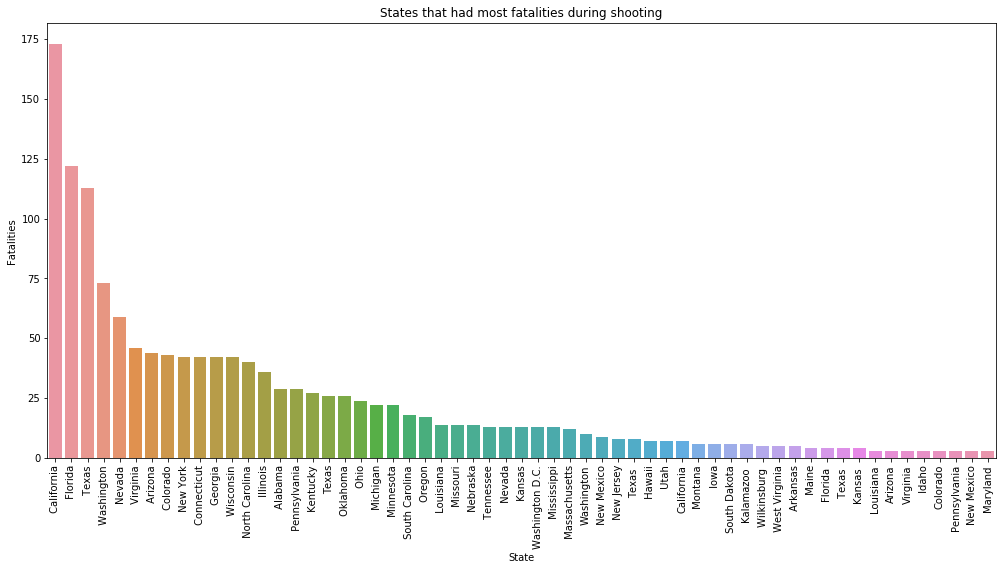

In [60]:
ms_update_state=pd.DataFrame(ms_state[['State','Fatalities']].groupby(['State'],
                                as_index=False).sum().sort_values(by='Fatalities',ascending=False))
plt.subplots(figsize=(17,8))
sns.barplot(x=ms_update_state[ms_update_state['Fatalities']>2]['State'],
            y=ms_update_state[ms_update_state['Fatalities']>2]['Fatalities'])
plt.title('States that had most fatalities during shooting')
plt.xticks(rotation=90)

In [61]:
ms_school = useful_data[['Shooting_year', 'Fatalities', 'Injured', 'Total victims','State',
                         'Race','Cause','Mental Health Issues',
                'FTarget', 'Area']][useful_data['Area'] == 'School']
ms_school.head()

,Shooting_year,Fatalities,Injured,Total victims,State,Race,Cause,Mental Health Issues,FTarget,Area
91,2015,1,3,4,Arizona,White,anger,Unknown,School,School
92,2015,10,7,16,Oregon,Other,terrorism,Unknown,School,School
148,2014,1,3,3,Florida,Black,terrorism,Yes,Random,School
153,2014,1,2,3,Washington,Other,terrorism,Yes,School,School
187,2012,7,3,10,California,Asian American,terrorism,Yes,Random,School


In [62]:
ms_school0 = ms_school[['Shooting_year', 'Total victims' ]].groupby(['Shooting_year'], 
                    as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
ms_school1 = ms_school[['Shooting_year', 'Fatalities' ]].groupby(['Shooting_year'],
                    as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
ms_school2 = ms_school[['Shooting_year', 'Injured' ]].groupby(['Shooting_year'], 
                    as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
ms_school3 = ms_school[['Shooting_year', 'Total victims' ]].groupby(['Shooting_year'], 
            as_index=False).count().sort_values(by='Shooting_year', ascending=False)

In [63]:
trace1=go.Scatter(mode='lines+markers',x=ms_school0['Shooting_year'],
                  y=ms_school0['Total victims'],name='Total Victims')
trace2=go.Scatter(mode='lines+markers',x=ms_school1['Shooting_year'],
                  y=ms_school1['Fatalities'],name='Fatalities')
trace3=go.Scatter(mode='lines+markers',x=ms_school2['Shooting_year'],
                  y=ms_school2['Injured'],name='Injuries')
trace4=go.Scatter(mode='lines',x=ms_school3['Shooting_year'],
                  y=ms_school3['Total victims'],name='Count of Shooting')
layout=dict(title='Shooting Stats in the school')

In [64]:
data=[trace1,trace2,trace3,trace4]
py.iplot(dict(data=data,layout=layout))

In [65]:
ms_sch_target_cnt = ms_school[['FTarget', 'Total victims' ]].groupby(['FTarget'],
            as_index=False).count().sort_values(by='Total victims', ascending=False)
ms_sch_target_sum = ms_school[['FTarget', 'Total victims' ]].groupby(['FTarget'],
        as_index=False).sum().sort_values(by='Total victims', ascending=False)

In [66]:
trace1=go.Pie(values=ms_sch_target_cnt['Total victims'],labels=ms_sch_target_cnt['FTarget'],
              hoverinfo="label+percent+name",name="Target type in Shooting",hole=0.2,domain={'x':[0,.5]})
trace2=go.Pie(values=ms_sch_target_sum['Total victims'],labels=ms_sch_target_sum["FTarget"],
              hoverinfo="label+percent",domain={'x':[0.5,1]},hole=0.2)
annotations=[]
annotations.append(dict(showarrow=False,font=dict(size=15),text='Target type in Shooting',x=0.1,y=-0.14))
annotations.append(dict(showarrow=False,font=dict(size=15),text='Victims type in Shooting',x=0.9,y=-0.14))
layout=dict(title=" \b Type of people in shooting and type of people affected in victims \b",
            annotations=annotations)
data=[trace1,trace2]
py.iplot(dict(data=data,layout=layout))

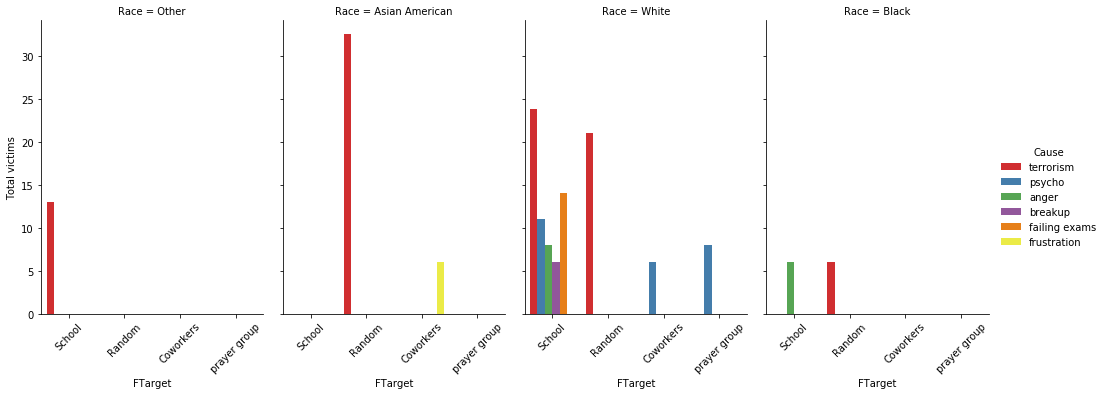

In [67]:

g = sns.factorplot(x='FTarget', y='Total victims', col='Race', hue= 'Cause', kind='bar', 
                   data=ms_school[ms_school['Total victims']>5], saturation=.8,
               ci=None, aspect=.7,  palette='Set1')
g.set_xticklabels(step=1,rotation=45)

In [68]:
gender_data=pd.DataFrame(useful_data[['Gender','Total victims']].groupby(['Gender'],
                                as_index=False).sum().sort_values(by='Total victims',ascending=False))

In [69]:
gender_data

,Gender,Total victims
1,Male,3096
3,Unknown,98
2,Male/Female,83
0,Female,38


Various colors : aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen

In [70]:
trace1=go.Scatter(y=gender_data['Total victims'],x=gender_data['Gender'])
layout=dict(title='Gender vs Mass Shooting',plot_bgcolor=('peachpuff'))
py.iplot(dict(data=[trace1],layout=layout))
